In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Sensitivity of cchem parameterspace to temperature, salinity, DIC, TA, nut. 
 
    PLOT omega, pH for : 
        TA=DIC=2000 at T = 5-25, S = 0 - 35
        


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
# import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#from oct2py import octave
#import seawater as sw
#from __future__ import print_function
# from numpy import *
# from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
# from matplotlib import reload
# plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
#     geo_tools,
#     tidetools
# )

%matplotlib inline

In [4]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([400,400])
T = np.zeros([400,400])
TA = np.zeros([400,400])
DIC = np.zeros([400,400])

S[:] = 30
T[:] = 10

for i in range(0,400):
    DIC[i,:] = 1800 + 1*i
for i in range(0,400):
    TA[:,i] = 1800 + 1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(400,400)
OmegaAr_vTD = OmegaA.reshape(400,400)

In [5]:
#salinity 0-35
#
S = np.zeros([200,350])
T = np.zeros([200,350])
TA = np.zeros([200,350])
DIC = np.zeros([200,350])

DIC[:] = 2000 * 1e-6
TA[:] = 2100 * 1e-6

for i in range(0,200):
    T[i,:] = 0.1*i
for i in range(0,350):
    S[:,i] = 0.1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC)
TAr = np.ravel(TA)

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vST = pH.reshape(200,350)
OmegaAr_vST = OmegaA.reshape(200,350)

In [6]:
#salinity 0-35
#
S = np.zeros([500,500])
T = np.zeros([500,500])
TA = np.zeros([500,500])
DIC = np.zeros([500,500])
phos = np.zeros([500,500])
sil = np.zeros([500,500])

DIC[:] = 2000 * 1e-6
TA[:] = 2100 * 1e-6
S[:] = 30
T[:] = 10

for i in range(0,500):
    phos[i,:] = 0.004 *i
for i in range(0,500):
    sil[:,i] = 0.1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC)
TAr = np.ravel(TA)
phosr = np.ravel(phos) * 1e-6
silr = np.ravel(sil) * 1e-6
zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=silr, phos=phosr, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vSP = pH.reshape(500,500)
OmegaAr_vSP = OmegaA.reshape(500,500)

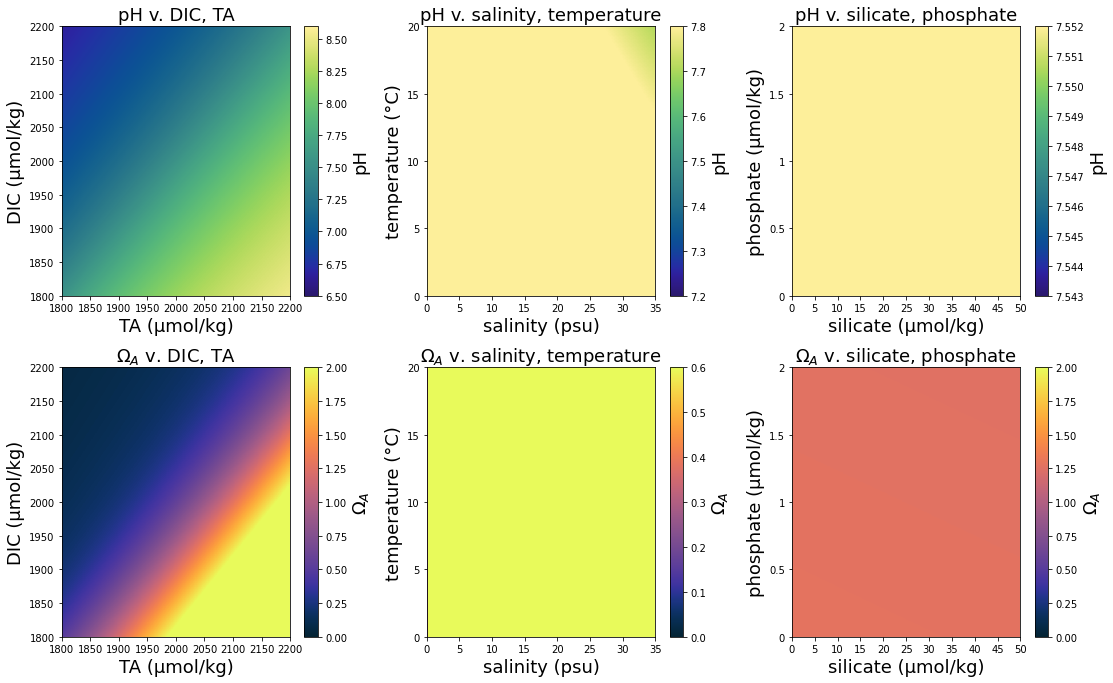

In [7]:
x = [0,1,2]
y = [0,1,2]
fa = 1.2
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
plt.subplots(2, 3, figsize=(13 *fa, 8 * fa), sharey=False)
#fig.tight_layout()

t_cmap = cm.cm.thermal
#tplt = OmegaAr_vDT

clabel = 'OmegaA'


####AX1######
#pH at DIC and TA from 1800-2200
v_min = 6.5
v_max = 8.6
t_cmap = cm.cm.haline

tplt = pHr_vTD
mesh = ax1.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax1.set_title('pH v. DIC, TA',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax1)
cbar.set_label('pH', fontsize = 18 )
ax1.set_xlabel('TA (μmol/kg)', fontsize = 18)
ax1.set_ylabel('DIC (μmol/kg)', fontsize = 18 )
# ax1.set_xticks(fontsize = 14)
# ax1.set_yticks(fontsize = 14)
major_xTD = np.arange(0, 401, 50)
x_labTD = (['1800','1850','1900','1950','2000','2050','2100','2150','2200'])
ax1.set_xticks(major_xTD)
ax1.set_yticks(major_xTD)
ax1.set_xticklabels(x_labTD)
ax1.set_yticklabels(x_labTD)


####ax2######
#pH at Salinity, Temp 
v_min = 7.2
v_max = 7.8
t_cmap = cm.cm.haline

tplt = pHr_vST
mesh = ax2.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax2.set_title('pH v. salinity, temperature',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax2)
cbar.set_label('pH', fontsize = 18 )
ax2.set_xlabel('salinity (psu)', fontsize = 18 )
ax2.set_ylabel('temperature (°C)', fontsize = 18 )
major_xST = np.arange(0, 351, 50)
major_yST = np.arange(0, 201, 50)
x_labST = (['0','5','10','15','20','25','30','35'])
y_labST = (['0','5','10','15','20'])
ax2.set_xticks(major_xST)
ax2.set_yticks(major_yST)
ax2.set_xticklabels(x_labST)
ax2.set_yticklabels(y_labST)


####ax5######
#pH at silicate, phosphate

v_min = 7.543
v_max = 7.552
t_cmap = cm.cm.haline

tplt = pHr_vSP
mesh = ax3.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax3.set_title('pH v. silicate, phosphate',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax3)
cbar.set_label('pH', fontsize = 18 )
ax3.set_xlabel('silicate (μmol/kg)', fontsize = 18 )
ax3.set_ylabel('phosphate (μmol/kg)', fontsize = 18 )
major_xSP = np.arange(0, 501, 50)
major_ySP = np.arange(0, 501, 125)
x_labSP = (['0','5','10','15','20','25','30','35','40','45','50'])
y_labSP = (['0','0.5','1','1.5','2'])
ax3.set_xticks(major_xSP)
ax3.set_yticks(major_ySP)
ax3.set_xticklabels(x_labSP)
ax3.set_yticklabels(y_labSP)

####AX4######
#OmA at DIC and TA from 1800-2200

v_min = 0
v_max = 2
t_cmap = cm.cm.thermal
tplt = OmegaAr_vTD
mesh = ax4.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax4.set_title('Ω$_A$ v. DIC, TA',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax4)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax4.set_xlabel('TA (μmol/kg)', fontsize = 18 )
ax4.set_ylabel('DIC (μmol/kg)', fontsize = 18 )
ax4.set_xticks(major_xTD)
ax4.set_yticks(major_xTD)
ax4.set_xticklabels(x_labTD)
ax4.set_yticklabels(x_labTD)



####ax4######
#OmA at Salinity, Temp 
v_min = 0
v_max = 0.6
t_cmap = cm.cm.thermal

tplt = OmegaAr_vST
mesh = ax5.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax5.set_title('Ω$_A$ v. salinity, temperature',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax5)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax5.set_xlabel('salinity (psu)', fontsize = 18 )
ax5.set_ylabel('temperature (°C)', fontsize = 18 )
ax5.set_xticks(major_xST)
ax5.set_yticks(major_yST)
ax5.set_xticklabels(x_labST)
ax5.set_yticklabels(y_labST)


####ax6######
#oma at silicate, phosphate
v_min = 0
v_max = 2
t_cmap = cm.cm.thermal

tplt = OmegaAr_vSP
mesh = ax6.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
ax6.set_title('Ω$_A$ v. silicate, phosphate',fontsize = 18 )
cbar = fig.colorbar(mesh, ax=ax6)
cbar.set_label('Ω$_A$', fontsize = 18 )
ax6.set_xlabel('silicate (μmol/kg)', fontsize = 18 )
ax6.set_ylabel('phosphate (μmol/kg)', fontsize = 18 )
major_xSP = np.arange(0, 501, 50)
major_ySP = np.arange(0, 501, 125)
ax6.set_xticks(major_xSP)
ax6.set_yticks(major_ySP)
ax6.set_xticklabels(x_labSP)
ax6.set_yticklabels(y_labSP)


plt.tight_layout()

In [8]:
# fig, ax4 = plt.subplots(subplot_kw={"projection": "3d"})


# v_min = 0
# v_max = 2
# t_cmap = cm.cm.thermal
# tplt = OmegaAr_vTD
# mesh = ax4.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
# ax4.set_title('Ω$_A$ v. DIC, TA',fontsize = 18 )
# cbar = fig.colorbar(mesh, ax=ax4)
# cbar.set_label('Ω$_A$', fontsize = 18 )
# ax4.set_xlabel('TA (μmol/kg)', fontsize = 18 )
# ax4.set_ylabel('DIC (μmol/kg)', fontsize = 18 )
# ax4.set_xticks(major_xTD)
# ax4.set_yticks(major_xTD)
# ax4.set_xticklabels(x_labTD)
# ax4.set_yticklabels(x_labTD)


In [9]:
TA = np.zeros([400,400])
DIC = np.zeros([400,400])

S[:] = 30
T[:] = 10

for i in range(0,400):
    DIC[i,:] = 1800 + 1*i
for i in range(0,400):
    TA[:,i] = 1800 + 1*i

print(DIC[0:400,0])

[1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810. 1811.
 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822. 1823.
 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834. 1835.
 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846. 1847.
 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859.
 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871.
 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883.
 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895.
 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907.
 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919.
 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931.
 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943.
 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 19

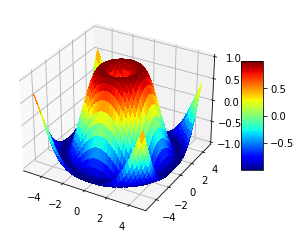

In [10]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [11]:
#salinity 30, temperature 10 , DIC AND TA vary from 1800 to 2200 

#salinity 0-35
#
S = np.zeros([400,400])
T = np.zeros([400,400])
TA = np.zeros([400,400])
DIC = np.zeros([400,400])

S[:] = 30
T[:] = 10

for i in range(0,400):
    DIC[i,:] = 1800 + 1*i
for i in range(0,400):
    TA[:,i] = 1800 + 1*i
    
Sr = np.ravel(S)
Tr = np.ravel(T)  
DICr = np.ravel(DIC) * 1e-6
TAr = np.ravel(TA) * 1e-6

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr_vTD = pH.reshape(400,400)
OmegaAr_vTD = OmegaA.reshape(400,400)




In [ ]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = DIC #np.arange(-5, 5, 0.25)
Y = TA #np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, OmegaAr_vTD, cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
print(wb.variables['dissolved_organic_nitrogen'])

In [ ]:
np.max(OmegaAr_vSP)

In [ ]:
np.min(OmegaAr_vSP)